In [1]:
# Import libraries and custom functions defined in Workbook_Init.py
from initial import *

df_raw = pd.read_csv('./dataset.csv')
df_raw.head(10)

,parking_yard_id,capacity,occcupancy,last_update
0,BHMBCCMKT01,577,61,10/4/2016 7:59
1,BHMBCCMKT01,577,64,10/4/2016 8:25
2,BHMBCCMKT01,577,80,10/4/2016 8:59
3,BHMBCCMKT01,577,107,10/4/2016 9:32
4,BHMBCCMKT01,577,150,10/4/2016 9:59
5,BHMBCCMKT01,577,177,10/4/2016 10:26
6,BHMBCCMKT01,577,219,10/4/2016 10:59
7,BHMBCCMKT01,577,247,10/4/2016 11:25
8,BHMBCCMKT01,577,259,10/4/2016 11:59
9,BHMBCCMKT01,577,266,10/4/2016 12:29


In [2]:
len(df_raw)

35717

In [3]:
df_raw.dtypes

parking_yard_id    object
capacity            int64
occcupancy          int64
last_update        object
dtype: object

In [4]:
df_clean = df_raw.copy()
df_clean.last_update = df_clean.last_update.astype('datetime64')
df_clean['PercentOccupied'] = df_clean.occcupancy / df_clean.capacity
df_clean['date'] = df_clean.last_update.dt.date
df_clean['dayofweek'] = df_clean.last_update.dt.dayofweek
df_clean['date_time_halfhour'] = df_clean.last_update.dt.round('30min')
df_clean['time'] = df_clean.date_time_halfhour.dt.time

df_clean.head(100)

,parking_yard_id,capacity,occcupancy,last_update,PercentOccupied,date,dayofweek,date_time_halfhour,time
0,BHMBCCMKT01,577,61,2016-10-04 07:59:00,0.105719,2016-10-04,1,2016-10-04 08:00:00,08:00:00
1,BHMBCCMKT01,577,64,2016-10-04 08:25:00,0.110919,2016-10-04,1,2016-10-04 08:30:00,08:30:00
2,BHMBCCMKT01,577,80,2016-10-04 08:59:00,0.138648,2016-10-04,1,2016-10-04 09:00:00,09:00:00
3,BHMBCCMKT01,577,107,2016-10-04 09:32:00,0.185442,2016-10-04,1,2016-10-04 09:30:00,09:30:00
4,BHMBCCMKT01,577,150,2016-10-04 09:59:00,0.259965,2016-10-04,1,2016-10-04 10:00:00,10:00:00
...,...,...,...,...,...,...,...,...,...
95,BHMBCCMKT01,577,64,2016-10-09 10:30:00,0.110919,2016-10-09,6,2016-10-09 10:30:00,10:30:00
96,BHMBCCMKT01,577,100,2016-10-09 11:04:00,0.173310,2016-10-09,6,2016-10-09 11:00:00,11:00:00
97,BHMBCCMKT01,577,126,2016-10-09 11:30:00,0.218371,2016-10-09,6,2016-10-09 11:30:00,11:30:00
98,BHMBCCMKT01,577,148,2016-10-09 11:57:00,0.256499,2016-10-09,6,2016-10-09 12:00:00,12:00:00


In [5]:
# filter out few 7:30 measurements
df_clean = df_clean[df_clean.time > datetime.time(7,30)]

In [6]:
df_clean.groupby('time').size()

time
08:00:00    2098
08:30:00    1969
09:00:00    1953
09:30:00    1983
10:00:00    1988
10:30:00    1984
11:00:00    1961
11:30:00    1988
12:00:00    1978
12:30:00    1980
13:00:00    1988
13:30:00    1958
14:00:00    1984
14:30:00    1989
15:00:00    1987
15:30:00    1984
16:00:00    1956
16:30:00    1959
dtype: int64

In [7]:
# drop duplicates
pre_len = len(df_clean)
df_clean = df_clean.drop_duplicates()

post_len = len(df_clean)

dropped_len = pre_len - post_len
print(dropped_len)

207


In [8]:
#values out of range of 0-100%
print('Minimum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.min()))
print('Maximum Percent Occupied: {:.2%}'.format(df_clean.PercentOccupied.max()))

Minimum Percent Occupied: -1.67%
Maximum Percent Occupied: 104.13%


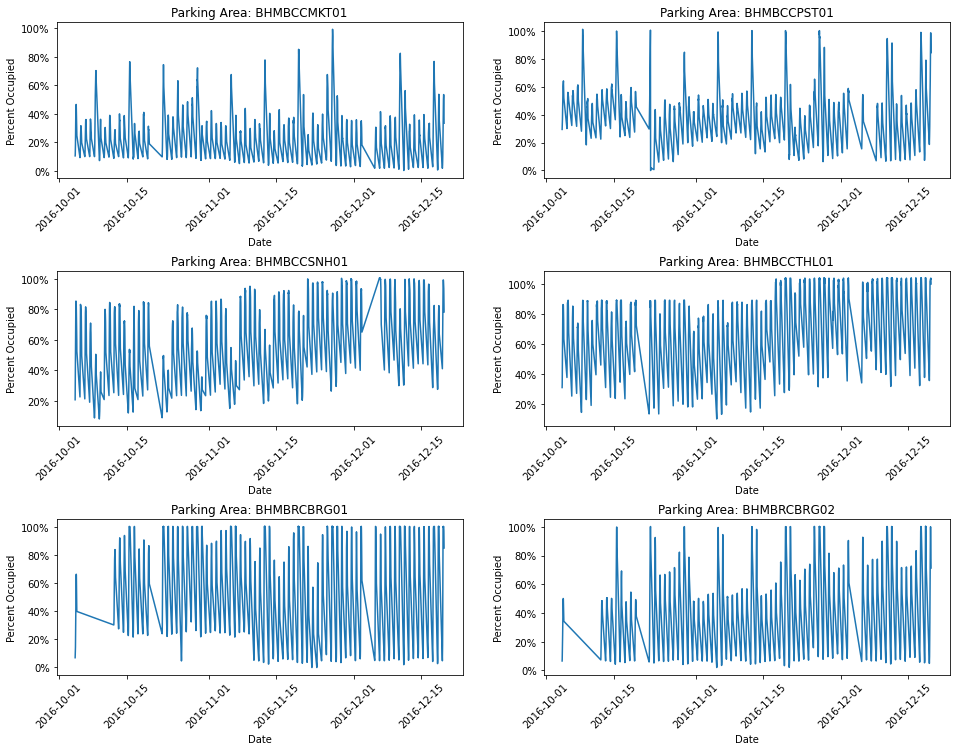

In [9]:
sample_plots_by_scn(df=df_clean, num_graphs=6, num_per_row=2)

In [10]:
df_agg_dthh = df_clean.groupby('date_time_halfhour').agg({'occcupancy':['sum','count'], 'capacity':['sum','count']})
df_agg_dthh['PercentOccupied'] = df_agg_dthh.occcupancy['sum'] / df_agg_dthh.capacity['sum']

In [11]:
df_agg_dthh[(df_agg_dthh.occcupancy['count']<20)|(df_agg_dthh.capacity['sum']<25000)]

occcupancy       capacity       PercentOccupied
                           sum count      sum count                
date_time_halfhour                                                 
2016-10-28 08:00:00         10     1      450     1        0.022222
2016-12-13 13:30:00        663     1      720     1        0.920833

In [12]:
df_agg_dthh.drop(columns=['occcupancy', 'capacity'], inplace=True)
df_agg_dthh.drop([pd.Timestamp('2016-10-28 08:00:00'), pd.Timestamp('2016-12-13 13:30:00')], inplace=True)

In [13]:
df_agg_dthh.head()

,PercentOccupied
,
date_time_halfhour,
2016-10-04 08:00:00,0.201437
2016-10-04 08:30:00,0.247512
2016-10-04 09:00:00,0.315444
2016-10-04 09:30:00,0.382376
2016-10-04 10:00:00,0.438917


In [14]:
temp = df_agg_dthh.reset_index()
temp['date'] = temp.date_time_halfhour.dt.date
temp['time'] = temp.date_time_halfhour.dt.time
temp = temp.groupby('date').count()
temp = pd.DataFrame(temp, index=pd.date_range('2016-10-04', '2016-12-19')).fillna(0)
temp[temp.date_time_halfhour<18]

C:\Users\moham\anaconda3\lib\site-packages\pandas\core\generic.py:3887: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,date_time_halfhour,PercentOccupied,time
,,,
2016-10-20,0.0,0.0,0.0
2016-10-21,0.0,0.0,0.0
2016-10-28,17.0,17.0,17.0
2016-10-30,16.0,16.0,16.0
2016-11-18,17.0,17.0,17.0
2016-11-25,17.0,17.0,17.0
2016-12-03,0.0,0.0,0.0
2016-12-04,0.0,0.0,0.0
2016-12-13,17.0,17.0,17.0


In [15]:
def fill_with_week_prior(df, column, year, month, day, hour, minutes):
  df.loc[pd.to_datetime(datetime.datetime(year, month, day, hour, minutes)), column] = \
      df.loc[pd.to_datetime(datetime.datetime(year, month, day, hour, minutes) + timedelta(days=-7)), column].values[0]

In [16]:
# all day loop
df_agg_fillmissing = df_agg_dthh.copy()

for hour in range(8, 17):
  for half_hour in [0, 30]:
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 20, hour, half_hour)
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 21, hour, half_hour)
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 12, 3, hour, half_hour)
    fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 12, 4, hour, half_hour)

# fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 20, 8, 0)
# fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 21, 8, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 30, 16, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 30, 16, 30)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 11, 18, 9, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 11, 25, 8, 30)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 12, 14, 11, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 10, 28, 8, 0)
fill_with_week_prior(df_agg_fillmissing, 'PercentOccupied', 2016, 12, 13, 13, 30)

df_agg_fillmissing.sort_index(inplace=True)

In [17]:
df_agg_fillmissing = df_agg_dthh.copy()
df_agg_fillmissing.sort_index(inplace=True)
temp = pd.Series(df_agg_fillmissing.index.date).value_counts()
temp[temp<18]

2016-12-13    17
2016-10-28    17
2016-12-14    17
2016-11-18    17
2016-11-25    17
2016-10-30    16
dtype: int64

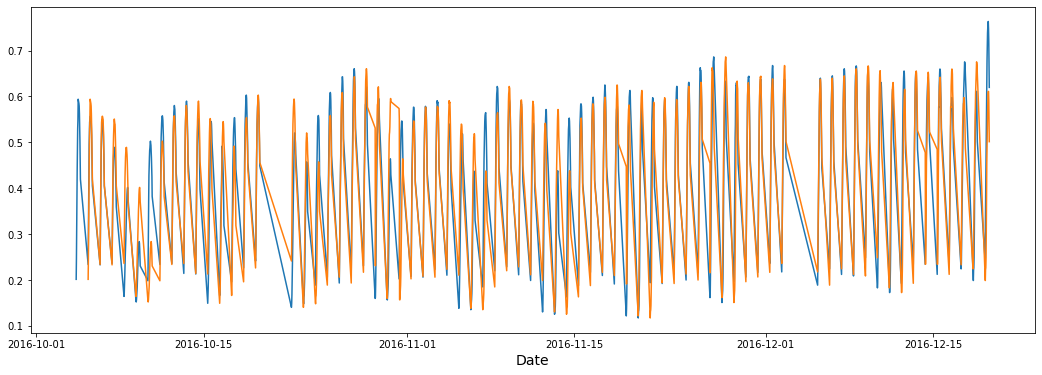

In [18]:
plt.figure(figsize=(18,6))
plt.plot(df_agg_fillmissing)
plt.plot(df_agg_fillmissing.shift(18))
plt.xlabel('Date', fontsize=14);

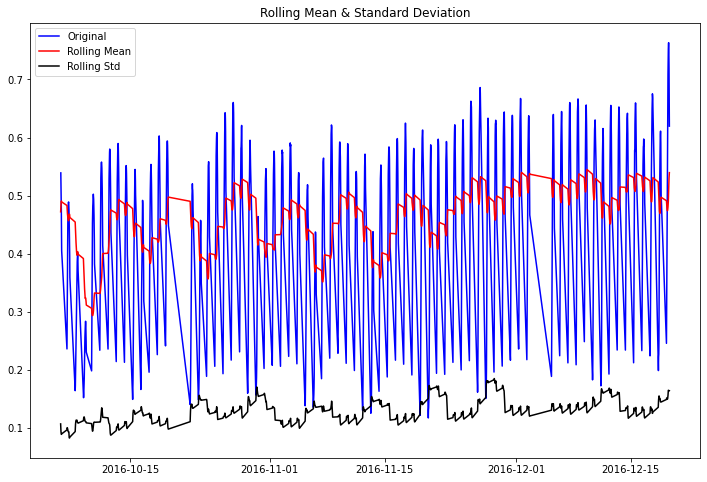

Results of Dickey-Fuller Test:
Test Statistic                   -3.763155
p-value                           0.003308
#Lags Used                       22.000000
Number of Observations Used    1284.000000
Critical Value (1%)              -3.435453
Critical Value (5%)              -2.863794
Critical Value (10%)             -2.567970
dtype: float64


In [19]:
test_stationarity(df_agg_fillmissing.squeeze(), 48)

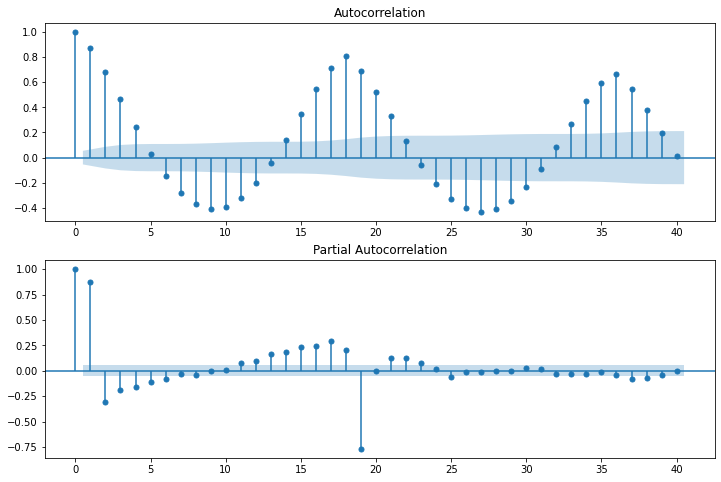

In [20]:
subplots_acf_pacf(df_agg_fillmissing)

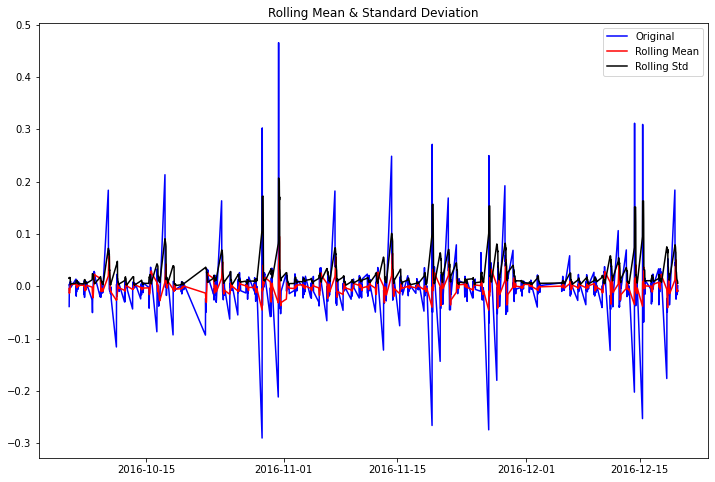

Results of Dickey-Fuller Test:
Test Statistic                -1.407557e+01
p-value                        2.888957e-26
#Lags Used                     1.900000e+01
Number of Observations Used    1.268000e+03
Critical Value (1%)           -3.435518e+00
Critical Value (5%)           -2.863822e+00
Critical Value (10%)          -2.567985e+00
dtype: float64


In [21]:
test_stationarity(df_agg_dthh.diff(18).diff().dropna().squeeze(), 7)

In [22]:
# Train-Test Split
# Sklearn built in split for time series

from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)
print(tscv)


data_use = df_agg_fillmissing.reset_index()['PercentOccupied']

for train_index, test_index in tscv.split(data_use):
  train = data_use[train_index]
  test = data_use[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=5)


In [23]:
TimeSeriesSplit(max_train_size=None, n_splits=5)

TimeSeriesSplit(max_train_size=None, n_splits=5)

In [24]:
train.index = df_agg_fillmissing.index[:len(train)]
train.tail()

date_time_halfhour
2016-12-07 13:00:00    0.655976
2016-12-07 13:30:00    0.660166
2016-12-07 14:00:00    0.655510
2016-12-07 14:30:00    0.640794
2016-12-07 15:00:00    0.608592
Name: PercentOccupied, dtype: float64

In [25]:
test.index = df_agg_fillmissing.index[len(train):]
test.head()

date_time_halfhour
2016-12-07 15:30:00    0.574477
2016-12-07 16:00:00    0.538965
2016-12-07 16:30:00    0.490934
2016-12-08 08:00:00    0.208799
2016-12-08 08:30:00    0.250975
Name: PercentOccupied, dtype: float64

ARIMA

In [26]:
%%time
# Define and fit ARIMA model
arima_model = ARIMA(train, order=(18, 1, 0))
results_AR = arima_model.fit(disp=-1)

C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

Wall time: 3min 31s


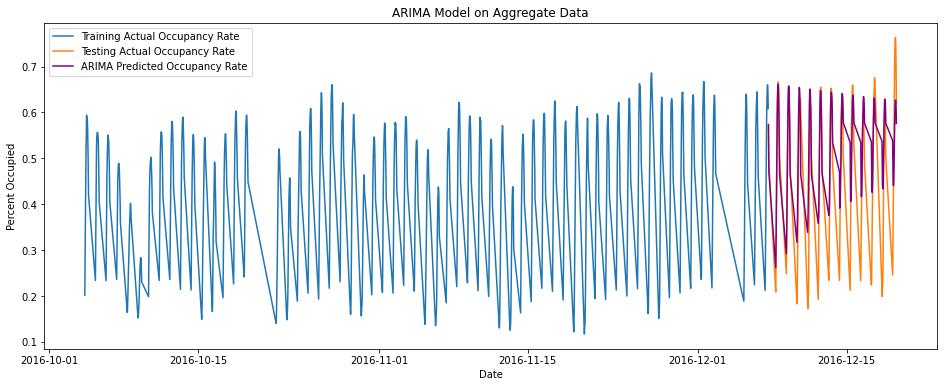

-----------------------------------------------------------------------------
ARIMA Model Metrics on Test Data
Explained Variance:
	 0.6337595741558724
MAE:
	 0.06397252540080652


In [27]:
plt.figure(figsize=(16,6))
plt.title('ARIMA Model on Aggregate Data')
plt.plot(train, label='Training Actual Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Percent Occupied')
y_pred_AR = pd.Series(results_AR.forecast(steps=len(test))[0], index=test.index)
plt.plot(test, label='Testing Actual Occupancy Rate')
plt.plot(y_pred_AR, color='purple', label='ARIMA Predicted Occupancy Rate')
plt.legend()

plt.show()


print('-'*77)
print('ARIMA Model Metrics on Test Data')
print('='*77)
report_metrics(test.squeeze(), y_pred_AR.squeeze())

In [28]:
%%time
# Define and fit SARIMA model
my_seasonal_order = (1, 1, 1, 18)
sarima_model = SARIMAX(train, order=(1, 0, 1), seasonal_order=my_seasonal_order)
results_SAR = sarima_model.fit(disp=-1)

C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Wall time: 3.99 s


C:\Users\moham\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


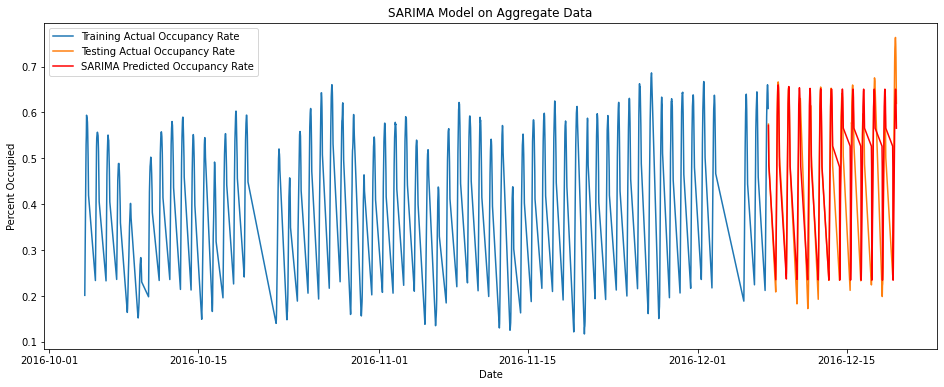

-----------------------------------------------------------------------------
SARIMA Model Metrics on Test Data
Explained Variance:
	 0.641036674910639
MAE:
	 0.06104523893431905


In [29]:
plt.figure(figsize=(16,6))
plt.title('SARIMA Model on Aggregate Data')
plt.plot(train, label='Training Actual Occupancy Rate')
plt.xlabel('Date')
plt.ylabel('Percent Occupied')
y_pred_sar = pd.Series(results_SAR.forecast(steps=len(test)).values, index=test.index)
plt.plot(test, label='Testing Actual Occupancy Rate')
plt.plot(y_pred_sar, color='red', label='SARIMA Predicted Occupancy Rate')
plt.legend()

plt.show()


print('-'*77)
print('SARIMA Model Metrics on Test Data')
print('='*77)
report_metrics(test.squeeze(), y_pred_sar.squeeze())